6.1

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import  ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

In [10]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [11]:
# Add new layers
x = base_model.output

# Global Average Pooling Layer
x = GlobalAveragePooling2D()(x)

# Add Dense layers
# Layer 1 with 1024 nodes and ReLU activation
x = Dense(1024, activation='relu')(x)

# Layer 2 with 1024 nodes and ReLU activation
x = Dense(1024, activation='relu')(x)

# Layer 3 with 512 nodes and ReLU activation
x = Dense(512, activation='relu')(x)

# Output layer with 3 nodes (3 classes) and Softmax activation
preds = Dense(3, activation='softmax')(x)

# Assign transfer base model + new layers to model
model = Model(inputs=base_model.input, outputs=preds)

# Freeze layers from the base MobileNet model up to index 86
for layer in model.layers[:86]:
    layer.trainable = False

# Unfreeze layers you added on top of the base model (layers from index 86 onwards)
for layer in model.layers[86:]:
    layer.trainable = True

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

c:\Users\Acer Aspire 7\Desktop\ImageProcessing\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

6.2

In [13]:
# Data preprocessing and image data generators
seed_value = 42  # Replace with your desired seed value
batch_size = 32  # Replace with your desired batch size
seed_val = 123
# Create DataGenerator objects
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode="nearest",
)

# Create Train Image generator
train_generator = datagen.flow_from_directory(
    './Lab6/Train/',  # Replace with your training data directory
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=True
)

# Create Validation Image generator
val_generator = datagen.flow_from_directory(
    './Lab6/Validate/',  # Replace with your validation data directory
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_val,
    shuffle=True
)

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


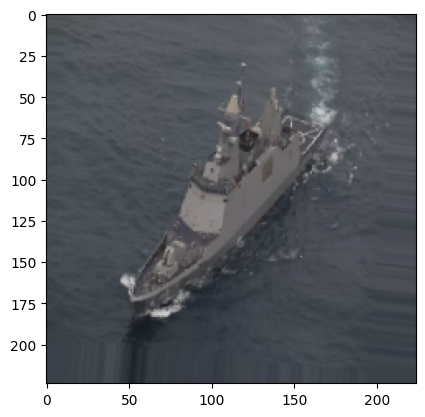

In [14]:
# Visualize a batch of training images
batch = train_generator.next()
images = batch[0]
scaled_images = (images + 1.0) / 2.0  # Rescale from [-1.0, 1.0] to [0.0, 1.0]
plt.imshow(scaled_images[0])
plt.show()
##Plot the images
# plt.figure(figsize=(12, 6))
# for i in range(min(9, batch_size)):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(scaled_images[i])
#     plt.axis('off')
# plt.suptitle('Training Images')
# plt.show()

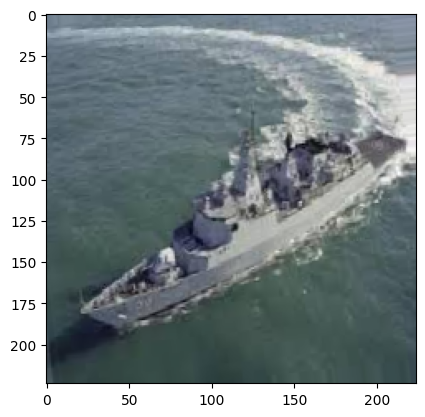

In [15]:
# Visualize a batch of validation images
batch = val_generator.next()
images = batch[0]
scaled_images = (images + 1.0) / 2.0  # Rescale from [-1.0, 1.0] to [0.0, 1.0]
plt.imshow(scaled_images[0])
plt.show()
# # Plot the images
# plt.figure(figsize=(12, 6))
# for i in range(min(9, batch_size)):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(scaled_images[i])
#     plt.axis('off')
# plt.suptitle('Validation Images')
# plt.show()

Found 69 images belonging to 3 classes.
Adjusted batch size to 23 to make step_size_train equal to step_size_val.


C:\Users\Acer Aspire 7\AppData\Local\Temp\ipykernel_2312\516500585.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/50
3/3 [==============================] - 10s 1s/step - loss: 1.0940 - accuracy: 0.3231 - val_loss: 0.9070 - val_accuracy: 0.4638
Epoch 2/50
3/3 [==============================] - 2s 664ms/step - loss: 0.8600 - accuracy: 0.5692 - val_loss: 0.8818 - val_accuracy: 0.4928
Epoch 3/50
3/3 [==============================] - 2s 659ms/step - loss: 0.8046 - accuracy: 0.5385 - val_loss: 0.6513 - val_accuracy: 0.6522
Epoch 4/50
3/3 [==============================] - 2s 849ms/step - loss: 0.6361 - accuracy: 0.6615 - val_loss: 0.5387 - val_accuracy: 0.7681
Epoch 5/50
3/3 [==============================] - 2s 672ms/step - loss: 0.4646 - accuracy: 0.8769 - val_loss: 0.4524 - val_accuracy: 0.8696
Epoch 6/50
3/3 [==============================] - 2s 621ms/step - loss: 0.4780 - accuracy: 0.8615 - val_loss: 0.4537 - val_accuracy: 0.7971
Epoch 7/50
3/3 [==============================] - 2s 764ms/step - loss: 0.4066 - accuracy: 0.8333 - val_loss: 0.4009 - val_accuracy: 0.8406
Epoch 8/50
3/3 [======

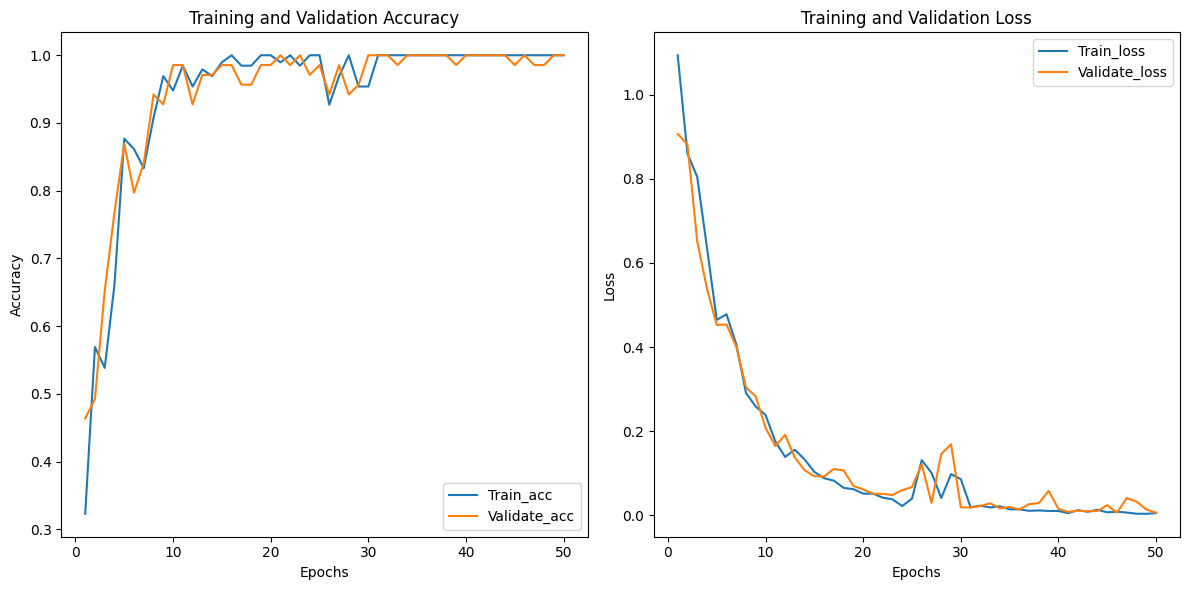

In [16]:
opts = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opts, metrics=['accuracy'])
eps = 50
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

# check step_size_train = step_size_val -> if not, adjust batch_size to make them equal
if step_size_train != step_size_val:
    print("Warning: step_size_train is not equal to step_size_val.")
    new_batch_size = val_generator.n // step_size_train
    val_generator = datagen.flow_from_directory(
        './Lab6/Validate/',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=new_batch_size,
        class_mode='categorical',
        seed=seed_val,
        shuffle=True
    )
    step_size_val = val_generator.n // val_generator.batch_size
    print(f"Adjusted batch size to {new_batch_size} to make step_size_train equal to step_size_val.")

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              validation_data=val_generator,
                              validation_steps=step_size_val,
                              epochs=eps,  # Use 'eps' instead of 'EP'
                              verbose=1)

# Performance Visualization
# Create a range of values for the x-axis (epochs)
epochs = range(1, eps + 1)  # Use 'eps' as the number of epochs

# View Accuracy (Training, Validation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label="Train_acc")
plt.plot(epochs, history.history["val_accuracy"], label="Validate_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label="Train_loss")
plt.plot(epochs, history.history['val_loss'], label="Validate_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Initial test generator
testPath = './Lab6/Test/'  # Replace with your test data directory
test_generator = datagen.flow_from_directory(
    testPath,
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=1
)

# Get class id for y_real_class
y_true = test_generator.classes

# Predict images according to test_generator
preds = model.predict_generator(test_generator)
print(preds.shape)
print(preds)

# Get predicted class labels (argmax along axis 1)
y_pred = np.argmax(preds, axis=1)
print(y_true)
print(y_pred)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)

y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)

# Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Found 15 images belonging to 3 classes.


C:\Users\Acer Aspire 7\AppData\Local\Temp\ipykernel_2312\3669431682.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


(15, 3)
[[9.9576133e-01 4.0335562e-03 2.0513618e-04]
 [9.8325366e-01 1.4604693e-02 2.1416100e-03]
 [9.7941417e-01 1.9643785e-02 9.4192923e-04]
 [8.9189816e-01 3.6074404e-02 7.2027497e-02]
 [1.4991714e-03 9.9791902e-01 5.8181316e-04]
 [1.0353634e-03 9.8497784e-01 1.3986720e-02]
 [8.8249948e-03 9.8616588e-01 5.0090635e-03]
 [1.2748484e-01 8.7024605e-01 2.2691670e-03]
 [3.9716729e-06 9.9989223e-01 1.0378687e-04]
 [9.3283452e-04 9.8663259e-01 1.2434550e-02]
 [6.3725128e-03 5.4037526e-05 9.9357337e-01]
 [5.9125639e-02 2.0993457e-03 9.3877500e-01]
 [2.5437206e-03 4.8500931e-04 9.9697125e-01]
 [1.6243978e-01 2.8696537e-03 8.3469063e-01]
 [3.6874553e-05 1.5784737e-03 9.9838471e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
Confusion Matrix:
[[4 0 0]
 [0 6 0]
 [0 0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       

1/1 [==============================] - 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


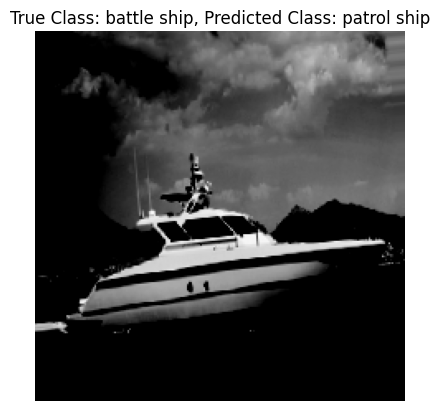

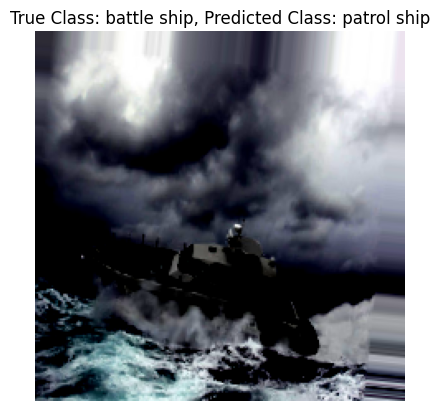

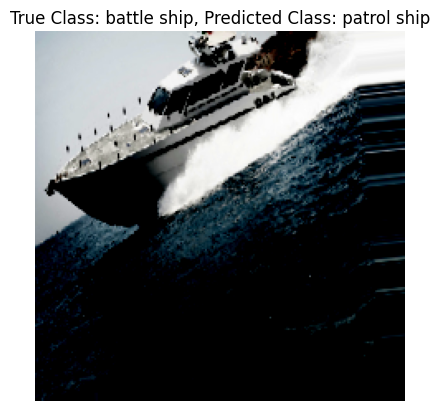

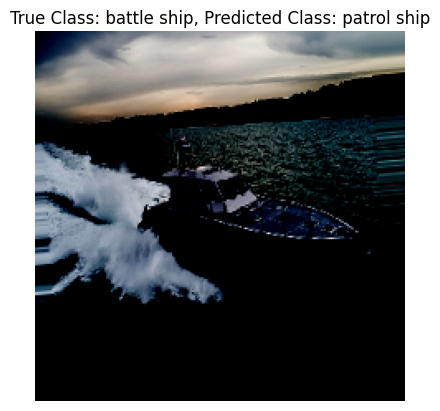

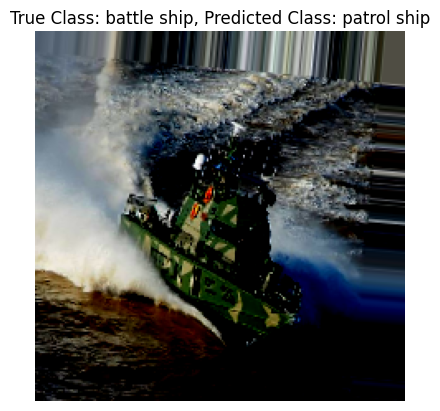

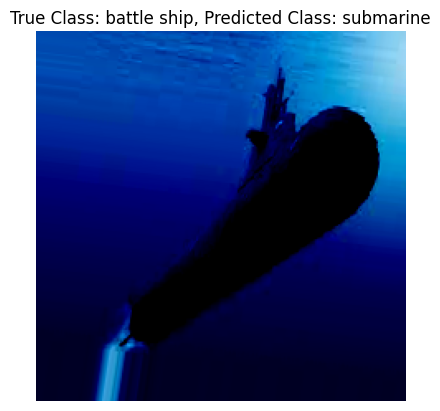

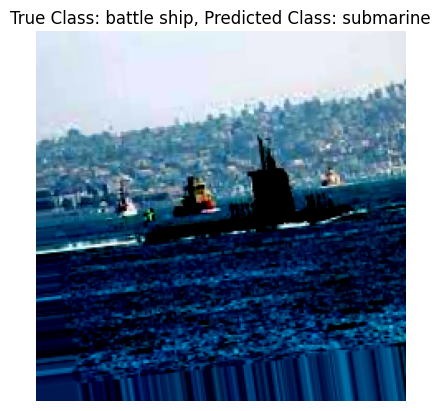

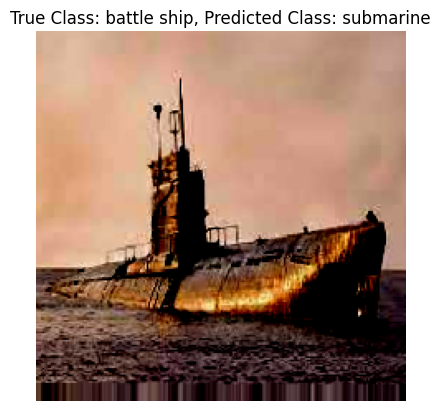

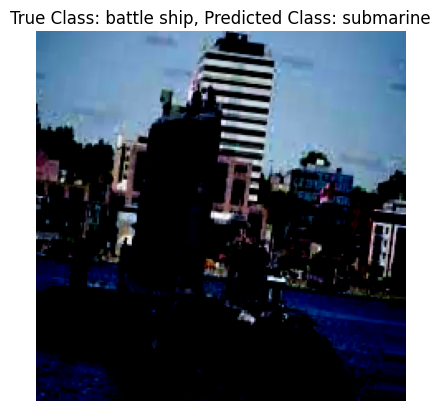

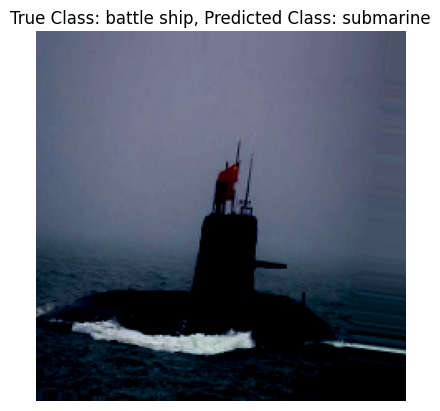

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined test_generator, model, and y_true as mentioned earlier

# Define class labels (replace with your class labels)
class_labels = ["battle ship", "patrol ship", "submarine"]

# Get 10 batches of test data (batch_size=1)
for _ in range(10):
    test_batch = test_generator.next()

    # Extract the image and true class label
    image = test_batch[0][0]  # Extract the image from the batch
    true_class = y_true[0]    # Get the true class label for the first image in the batch

    # Predict the class probabilities for the image
    pred_probabilities = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(pred_probabilities)

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(f"True Class: {class_labels[true_class]}, Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')

plt.show()
